## 1) trainset / testset

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
iris = sns.load_dataset('iris')

iris = iris[['sepal_length', 'sepal_width', 'species']]
iris['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2], inplace=True)

y = iris['species']
X = iris.drop('species', axis=1)

### séparation des données en deux groupes, un pour entrainer le modèle, un autre pour le tester.

In [36]:
from sklearn.model_selection import train_test_split 
# sépare entre split d'entrainemen et split de test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
#test_size répartie 20% dans le test set et 80% dans le train set.
#random_state permet de contrôler l'aléatoire
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)
print(X_test)

Train set: (120, 2)
Test set: (30, 2)
     sepal_length  sepal_width
82            5.8          2.7
134           6.1          2.6
114           5.8          2.8
42            4.4          3.2
109           7.2          3.6
57            4.9          2.4
1             4.9          3.0
70            5.9          3.2
25            5.0          3.0
84            5.4          3.0
66            5.6          3.0
133           6.3          2.8
102           7.1          3.0
107           7.3          2.9
26            5.0          3.4
23            5.1          3.3
123           6.3          2.7
130           7.4          2.8
21            5.1          3.7
12            4.8          3.0
71            6.1          2.8
128           6.4          2.8
48            5.3          3.7
72            6.3          2.5
88            5.6          3.0
148           6.2          3.4
74            6.4          2.9
96            5.7          2.9
63            6.1          2.9
132           6.4          2.8


Text(0.5, 1.0, 'Test set')

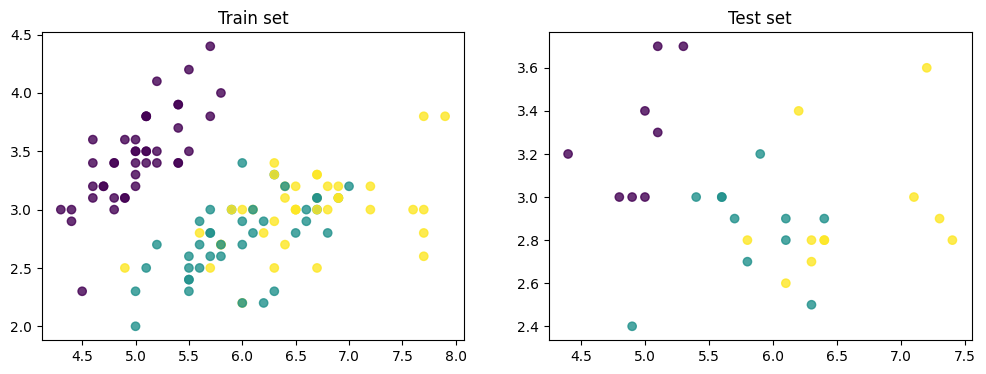

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, alpha=0.8)
plt.title('Test set')

## 2) entrainement d'un modèle de machine learning

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
"""model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
print('Test_score:', model.score(X_test, y_test))"""
#attention => ne pas faire, validation sur les tests qui doivent être utiliser plus tard , passer à l'étape suivante

"model = KNeighborsClassifier(n_neighbors=3)\n\nmodel.fit(X_train, y_train)\nprint('Test_score:', model.score(X_test, y_test))"

### cross validation => validation set

réglage des hyper-paramètres pour l'optimiser et se rapprocher de 1

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [57]:
cv = StratifiedKFold() # ordi répartit les class pour fait des tas proportionné => à préférer
cross_val_score(KNeighborsClassifier(), X, y , cv =cv).mean()

0.76

In [43]:
"""val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)"""
#utiliser validation_curve pour tester pour faire cette étape

'val_score = []\nfor k in range(1, 50):\n    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()\n    val_score.append(score)\nplt.plot(val_score)'

### validation curve

In [58]:
from sklearn.model_selection import validation_curve

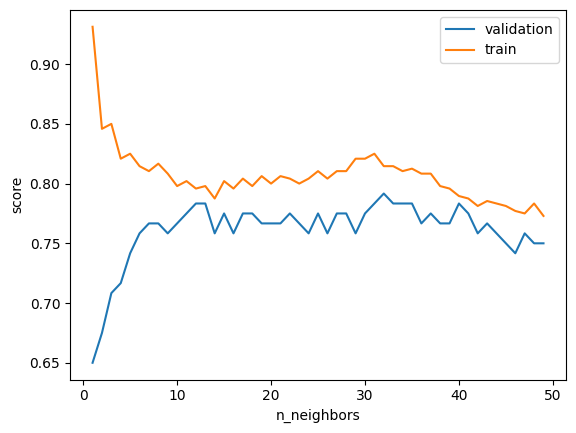

In [59]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', 
                                        param_range= k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### GridSearchCV

permet de trouver le modèle avec les meilleurs hyperparamètres

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {'n_neighbors': np.arange(1, 20), 
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [62]:
grid.best_score_

0.8

In [63]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13}

In [65]:
model = grid.best_estimator_

In [66]:
model.score(X_test, y_test)

0.8333333333333334

## confusion metrice

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  4,  7]], dtype=int64)

## learning_curve (courbe d'apprentissage)

savoir si notre modèle serait meilleur si on rajoute des données

In [54]:
from sklearn.model_selection import learning_curve

c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\environnement\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\environnement\.venv\lib\site-packages\sklearn\base.py", line 638, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_base.py", line 810, in kneighbors
    raise ValueErro

[ 9 19 28 38 48 57 67 76 86 96]


c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\environnement\.venv\lib\site-packages\sklearn\metrics\_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\environnement\.venv\lib\site-packages\sklearn\base.py", line 638, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "c:\environnement\.venv\lib\site-packages\sklearn\neighbors\_base.py", line 810, in kneighbors
    raise ValueErro

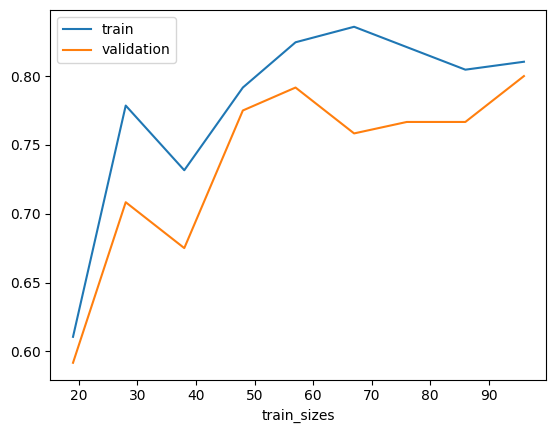

In [55]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                            train_sizes= np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis = 1),label='train')
plt.plot(N, val_score.mean(axis= 1), label='validation')
plt.xlabel('train_sizes')
plt.legend()